In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [2]:
mush = pd.read_csv('mushrooms.csv')
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
mush['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [5]:
mush['veil-type'].unique()

array(['p'], dtype=object)

In [6]:
mush['ring-number'].unique()

array(['o', 't', 'n'], dtype=object)

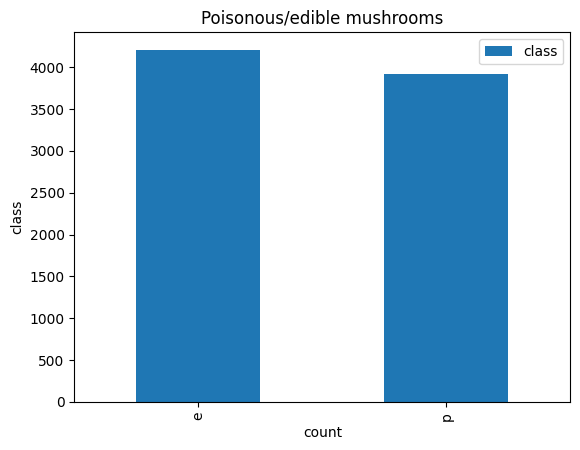

In [7]:
plt.figure()
pd.Series(mush['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel('class')
plt.xlabel('count')
plt.title('Poisonous/edible mushrooms')
plt.legend()

#Data Preprocessing

In [8]:
X=mush.drop('class',axis=1) 
y=mush['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [9]:
label = LabelEncoder() 
for col in X.columns:
    X[col] = label.fit_transform(X[col])
y = label.fit_transform(y)

In [10]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [11]:
display(len(X))
display(len(y))


8124

8124

Dropping this feature, 'veil-type' having 0 values and not contributing to the data 


In [12]:
data = X.copy()
data.drop('veil-type',axis=1,inplace=True)
display(data)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


Dropping highly correlated features having correlation > 0.8

In [13]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


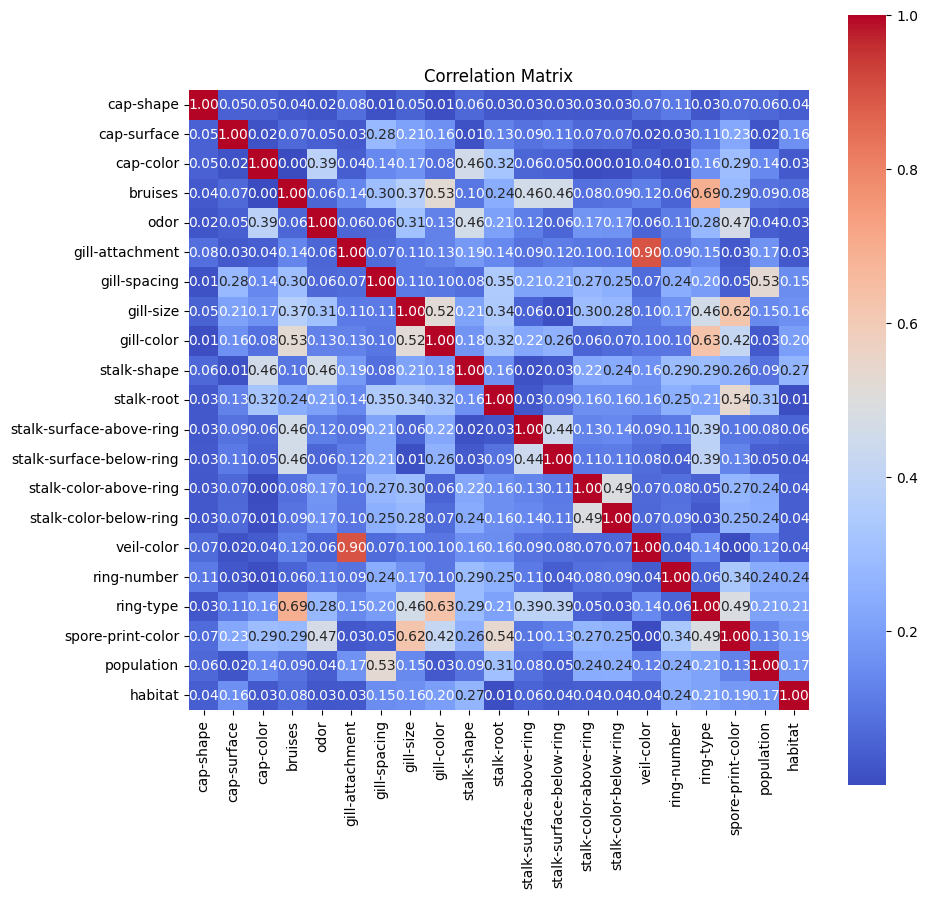

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [15]:
to_drop

['veil-color']

In [16]:
data.drop(to_drop, axis=1, inplace=True)

In [17]:
one_hot = pd.get_dummies(X,columns=X.columns)
one_hot

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,...,population_3,population_4,population_5,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Splitting the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(one_hot,y,test_size=0.25, random_state=42)

In [19]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [20]:
pca = PCA(n_components = 10)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Standardization

In [21]:
len(y_test)

2031

In [22]:
lm = LogisticRegression()
lm.fit(X_train,y_train)


LogisticRegression()

In [23]:
y_pred = lm.predict(X_test)

display(accuracy_score(y_test,y_pred))
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.9527326440177253

'predicted range: [0.00,1.00]'

'precision = [0.9609375  0.94438928]'

'recall = [0.94615385 0.95963673]'

'f-score = [0.95348837 0.95195195]'

Using gridSearch

In [24]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


In [25]:
lr = LogisticRegression(random_state=42)

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [26]:
print('best parameters:', grid_search.best_params_)
print('accuracy:', grid_search.score(X_test, y_test))

best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy: 0.9527326440177253


#With weights

In [27]:
len(y_test)

2031

In [28]:
lr = LogisticRegression(class_weight={0:0.17, 1:0.83})
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.17, 1: 0.83})

In [29]:
y_pred = lr.predict(X_test)

display(accuracy_score(y_test,y_pred))
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.9586410635155096

'predicted range: [0.00,1.00]'

'precision = [0.99482402 0.9258216 ]'

'recall = [0.92403846 0.99495459]'

'f-score = [0.95812562 0.95914397]'

#SVM

Using linear kernel

In [30]:
clf = svm.SVC(kernel='linear', class_weight={0:1, 1:10})
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
display(accuracy_score(y_test,y_pred))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


0.9566715903495815

'precision = [1.       0.918443]'

'recall = [0.91538462 1.        ]'

'f-score = [0.95582329 0.95748792]'

Using RBF 

In [31]:
clf1 = svm.SVC(kernel='rbf', class_weight={0:1, 1:10})
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
display(accuracy_score(y_test,y_pred))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.9945839487936977

'precision = [1.         0.98902196]'

'recall = [0.98942308 1.        ]'

'f-score = [0.99468342 0.99448068]'

In [32]:
clf2 = svm.SVC(kernel='rbf', class_weight='balanced')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
display(accuracy_score(y_test,y_pred))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.999015263417036

'precision = [0.99808061 1.        ]'

'recall = [1.         0.99798184]'

'f-score = [0.99903939 0.9989899 ]'

In [33]:
len(y)

8124

In [34]:
X_train[:, 1]

array([ 0.39789289, -5.62571016, -1.49968438, ..., -0.97229856,
        3.48392009,  0.33469128])

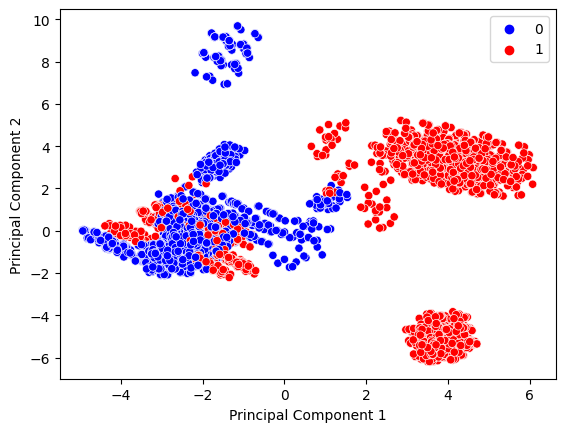

In [35]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['blue', 'red'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Using poly

In [36]:
clf1 = svm.SVC(kernel='poly', class_weight={0:1, 1:10})
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
display(accuracy_score(y_test,y_pred))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.9743968488429345

'precision = [1.         0.95014382]'

'recall = [0.95 1.  ]'

'f-score = [0.97435897 0.97443461]'

In [37]:
clf1 = svm.SVC(kernel='linear', class_weight='balanced')
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
display(accuracy_score(y_test,y_pred))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

0.9571639586410635

'precision = [0.97224975 0.94227006]'

'recall = [0.94326923 0.97174571]'

'f-score = [0.95754026 0.95678092]'